In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import scipy
import csv as csv
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
from numpy import array
import cv2
import os

import random
from PIL import Image 
from PIL import ImageFilter
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
import re

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))



In [47]:
train='./train/'
test='./test/'

train_images=[train+i for i in os.listdir(train)]
test_images=[test+i for i in os.listdir(test)]


In [48]:
train

'./train/'

In [49]:
train_dogs=[]
labels=[]
pradictlabel=[]

In [51]:
train_images

['./train/cat.0.jpg',
 './train/cat.1.jpg',
 './train/cat.10.jpg',
 './train/cat.100.jpg',
 './train/cat.1000.jpg',
 './train/cat.10000.jpg',
 './train/cat.10001.jpg',
 './train/cat.10002.jpg',
 './train/cat.10003.jpg',
 './train/cat.10004.jpg',
 './train/cat.10005.jpg',
 './train/cat.10006.jpg',
 './train/cat.10007.jpg',
 './train/cat.10008.jpg',
 './train/cat.10009.jpg',
 './train/cat.1001.jpg',
 './train/cat.10010.jpg',
 './train/cat.10011.jpg',
 './train/cat.10012.jpg',
 './train/cat.10013.jpg',
 './train/cat.10014.jpg',
 './train/cat.10015.jpg',
 './train/cat.10016.jpg',
 './train/cat.10017.jpg',
 './train/cat.10018.jpg',
 './train/cat.10019.jpg',
 './train/cat.1002.jpg',
 './train/cat.10020.jpg',
 './train/cat.10021.jpg',
 './train/cat.10022.jpg',
 './train/cat.10023.jpg',
 './train/cat.10024.jpg',
 './train/cat.10025.jpg',
 './train/cat.10026.jpg',
 './train/cat.10027.jpg',
 './train/cat.10028.jpg',
 './train/cat.10029.jpg',
 './train/cat.1003.jpg',
 './train/cat.10030.jpg',
 '.

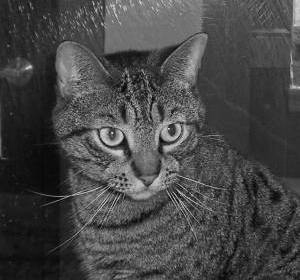

In [73]:
k=Image.open(train_images[1]).convert("L")# 흑백으로 전환
size=64,64
k        

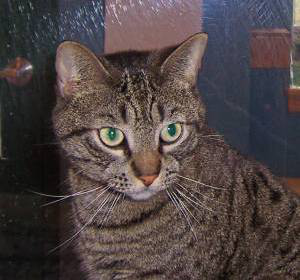

In [54]:
Image.open(train_images[1])

In [74]:
k= k.resize(size, Image.ANTIALIAS)     

       #pil_im =pil_im.filter(ImageFilter.FIND_EDGES)
k=k.filter(ImageFilter.GaussianBlur(255))
k=k.histogram()


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4096,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [87]:
k=np.array(k)
k

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 4096,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [61]:
def label_extract():
    for i in os.listdir(train):
        if "dog" in i:
            train_dogs.append(i)
            labels.append(1)
        else:
            labels.append(0)

In [62]:
def getreslut(predictlabel,labels):
    total=0
    new_predict=[]
    for a in range(0,len(labels)):
        if float(predictlabel[a])>0.5:
            new_predict.append(1)
        else:
            new_predict.append(0)
            
            
        if new_predict[a]==labels[a]:
            total+=1
            
            
            
    print("Accuracy:",total,"/",len(labels),"* 100 =","{0:.3f}".format(total/len(labels)*100),"%")

In [96]:
def svm(y):
    result=[]
    pix_val=0
    new_image=[]
    placeholder=[]
    
    
    svm=LinearSVC()
    clf=LogisticRegression()
    
    
    for i in train_images:
        pil_im=Image.open(i).convert("L")
        size=64,64
        
        
        pil_im=pil_im.resize(size,Image.ANTIALIAS)
        pil_im=pil_im.filter(ImageFilter.GaussianBlur(255))
        pix_val=pil_im.histogram()
        pix_val=np.array(pix_val)
        pix_val=pix_val.reshape(1,pix_val[0])
        result.append((pix_val))
        
        
    clf=clf.fit(result,y)
    return clf


In [94]:
def get_test():
    results=[]
    total=0
    my_file=open("results.csv","w")
    wr=csv.writer(my_file,quoting=csv.QUOTE_NONE,quotechar="",escapechar="//")
    wr.writerow(["id","label"])
    
    for i in range(0,20):
        j=train_images[i]
        pil_im=Image.open[j].convert("L")
        size=64.64
        pil_im=pil_im.resize(size,Image.ANTIALIAS)# 선이나 도형을 계단없이 부드럽게 보여주는 것
        pil_im=pil_im.filter(ImageFilter.GaussianBlur(255))
        pix_val=pil_im.histogram()
        
        
        x=str(clf.predict_proba([pix_val]))
        x=x[2:-2]
        x=re.split("\s+",x)
        results.append(x[2])
        wr.writerow([i+1,float(x[2])])
        
    flattened = [val for sublist in results for val in sublist]  
    print("LEn",len(results))

In [97]:
y=label_extract()   #get correct labels

clf=svm(y)   #get trained svm 

imageinfo = getTests(clf) 

ValueError: total size of new array must be unchanged